In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [39]:
# Download the stopwords dataset
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Manoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# Define the file path
file_path = r'C:\Users\Manoj\Downloads\Email spam dectector\spam.csv'

# Load the dataset
if os.path.exists(file_path):
    df = pd.read_csv(file_path, encoding='latin-1')  # Adjust encoding if necessary
else:
    raise FileNotFoundError("File not found. Please check the path and filename.")


In [41]:
# Drop unnecessary columns
columns_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df.drop(columns=columns_to_drop, inplace=True)

# Rename columns
df.rename(columns={"v1": "Category", "v2": "Message"}, inplace=True)

In [42]:
# Convert 'Category' to numeric values
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})

In [43]:
# Display basic info and statistics
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

   Category                                            Message
0         1  Go until jurong point, crazy.. Available only ...
1         1                      Ok lar... Joking wif u oni...
2         0  Free entry in 2 a wkly comp to win FA Cup fina...
3         1  U dun say so early hor... U c already then say...
4         1  Nah I don't think he goes to usf, he lives aro...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int64 
 1   Message   5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB
None
          Category
count  5572.000000
mean      0.865937
std       0.340751
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Category    0
Message     0
dtype: int64


In [45]:
# Plot distribution of emails
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

C:\Users\Manoj\AppData\Local\Temp\ipykernel_4600\1666105210.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='pastel')


([<matplotlib.axis.XTick at 0x2aa09694e60>,
 [Text(0, 0, 'Spam'), Text(1, 0, 'Ham')])

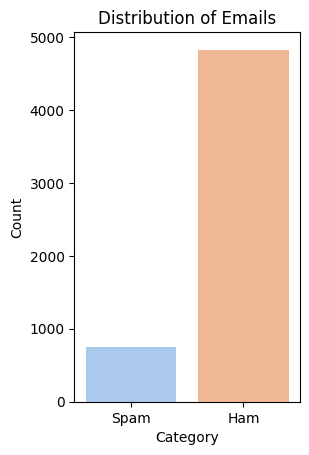

In [49]:
# Countplot for category distribution
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Category', palette='pastel')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Emails')
plt.xticks(ticks=[0, 1], labels=['Spam', 'Ham'])

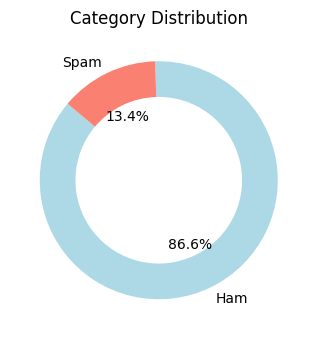

In [50]:
# Pie chart for category distribution
plt.subplot(1, 2, 2)
plt.pie(df['Category'].value_counts(), labels=['Ham', 'Spam'], autopct='%1.1f%%', colors=['lightblue', 'salmon'], startangle=140, wedgeprops=dict(width=0.3))
plt.title('Category Distribution')
plt.tight_layout()
plt.show()

In [51]:
# Separate features and target
X = df["Message"]
Y = df["Category"]

In [52]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [54]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

# Transform data
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

# Convert Y to integer type
Y_train = Y_train.astype("int")
Y_test = Y_test.astype("int")


In [55]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_features, Y_train)


LogisticRegression(max_iter=1000)

In [56]:
# Make predictions
predict_train_data = model.predict(X_train_features)
predict_test_data = model.predict(X_test_features)

In [57]:
# Model Evaluation
print(f"Accuracy on training data: {accuracy_score(Y_train, predict_train_data):.2f}")
print(f"Accuracy on testing data: {accuracy_score(Y_test, predict_test_data):.2f}")

Accuracy on training data: 0.97
Accuracy on testing data: 0.96


In [58]:
# Predict new data
new_mail = ["Congratulations on your recent achievement! Well done."]
new_data_features = vectorizer.transform(new_mail)
prediction = model.predict(new_data_features)
print("Prediction:", "Ham Mail" if prediction[0] == 1 else "Spam Mail")

Prediction: Ham Mail


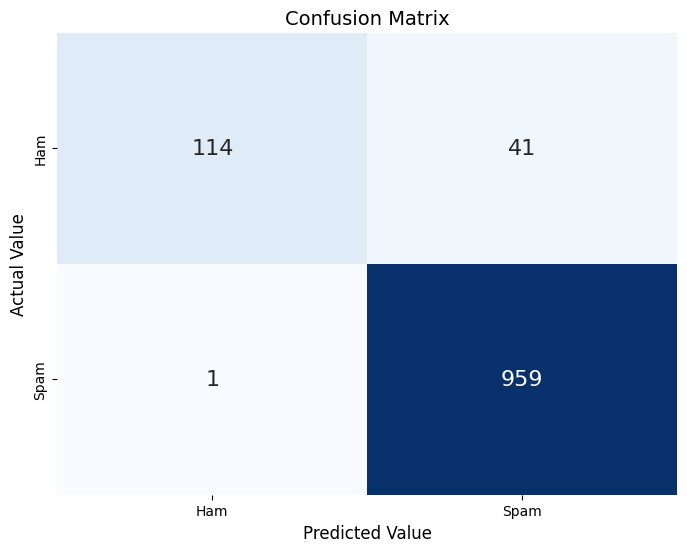

In [59]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, predict_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'], annot_kws={"size": 16})
plt.xlabel("Predicted Value", fontsize=12)
plt.ylabel("Actual Value", fontsize=12)
plt.title("Confusion Matrix", fontsize=14)
plt.show()

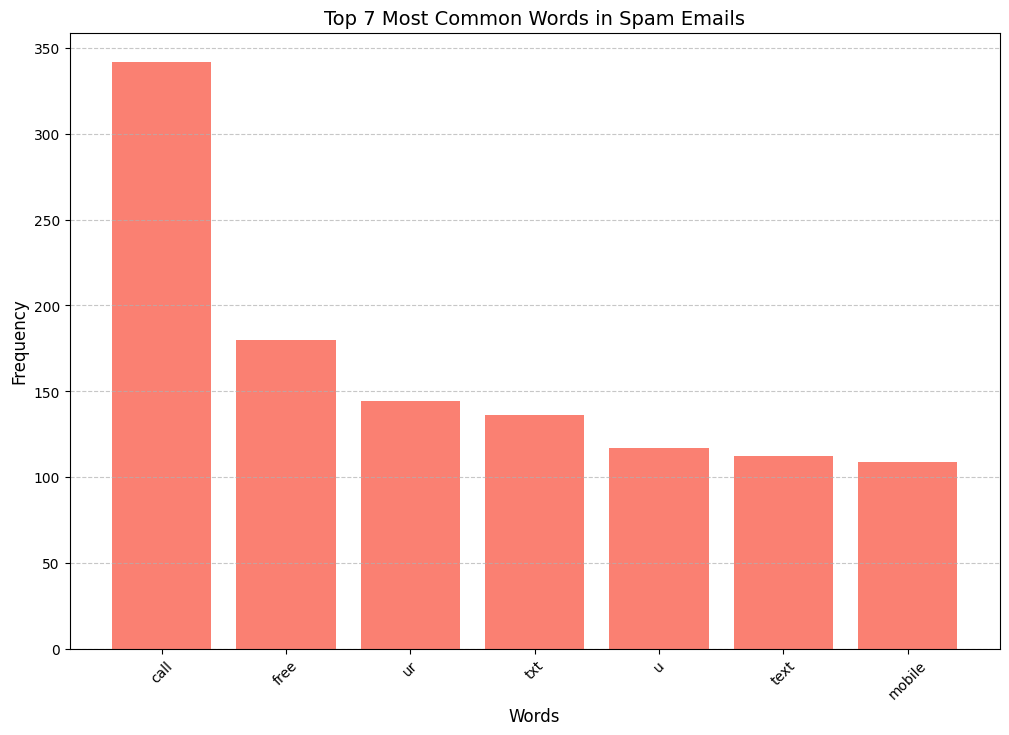

In [60]:
# Data visualization - Top 7 Most Common Words in Spam Emails
stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(12, 8))
top_words = spam_word_freq.most_common(7)
words, counts = zip(*top_words)
plt.bar(words, counts, color='salmon')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 7 Most Common Words in Spam Emails', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()